<center>
<h1>
Classify Human Body Level Using SVM
</h1>
</center>

# 1. Read Data

## 1.1 import necessary libraries

In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

## 1.2 read data

In [2]:
# read the csv file
df = pd.read_csv('body_level_classification_train.csv')
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


## 1.3 Describe the data

In [3]:
# explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1477 non-null   object 
 1   Age                 1477 non-null   float64
 2   Height              1477 non-null   float64
 3   Weight              1477 non-null   float64
 4   H_Cal_Consump       1477 non-null   object 
 5   Veg_Consump         1477 non-null   float64
 6   Water_Consump       1477 non-null   float64
 7   Alcohol_Consump     1477 non-null   object 
 8   Smoking             1477 non-null   object 
 9   Meal_Count          1477 non-null   float64
 10  Food_Between_Meals  1477 non-null   object 
 11  Fam_Hist            1477 non-null   object 
 12  H_Cal_Burn          1477 non-null   object 
 13  Phys_Act            1477 non-null   float64
 14  Time_E_Dev          1477 non-null   float64
 15  Transport           1477 non-null   object 
 16  Body_L

In [4]:
df.describe()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,24.290420,1.701602,86.542290,2.421912,2.005120,2.682104,1.023106,0.650672
std,6.323081,0.094654,26.278277,0.540711,0.620307,0.790751,0.844840,0.605199
min,15.000000,1.456346,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.895877,1.629194,65.000000,2.000000,1.549931,2.644692,0.145687,0.000000
50%,22.720449,1.701284,82.636162,2.416044,2.000000,3.000000,1.000000,0.616045
75%,26.000000,1.770278,106.690530,3.000000,2.482933,3.000000,1.672639,1.000000
max,55.246250,1.980000,173.000000,3.000000,3.000000,4.000000,3.000000,2.000000


## 1.4 View the frequency of each class in the target variable

<Axes: xlabel='Body_Level', ylabel='count'>

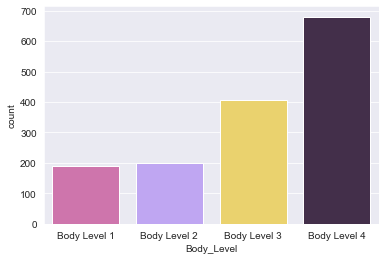

In [68]:
# visualize the data
color_palette = ['#dd66af','#bb99ff','#ffde59','#452b4e']
sns.countplot(x='Body_Level', data=df, palette=color_palette)


it's obvious that the data is imbalanced, in my implementation I will try oversampling technique `SMOTE` to balance the data, and also, I will try `weighted svm` to see if it can handle the imbalanced data.

## 1.5 View the destribution of each feature

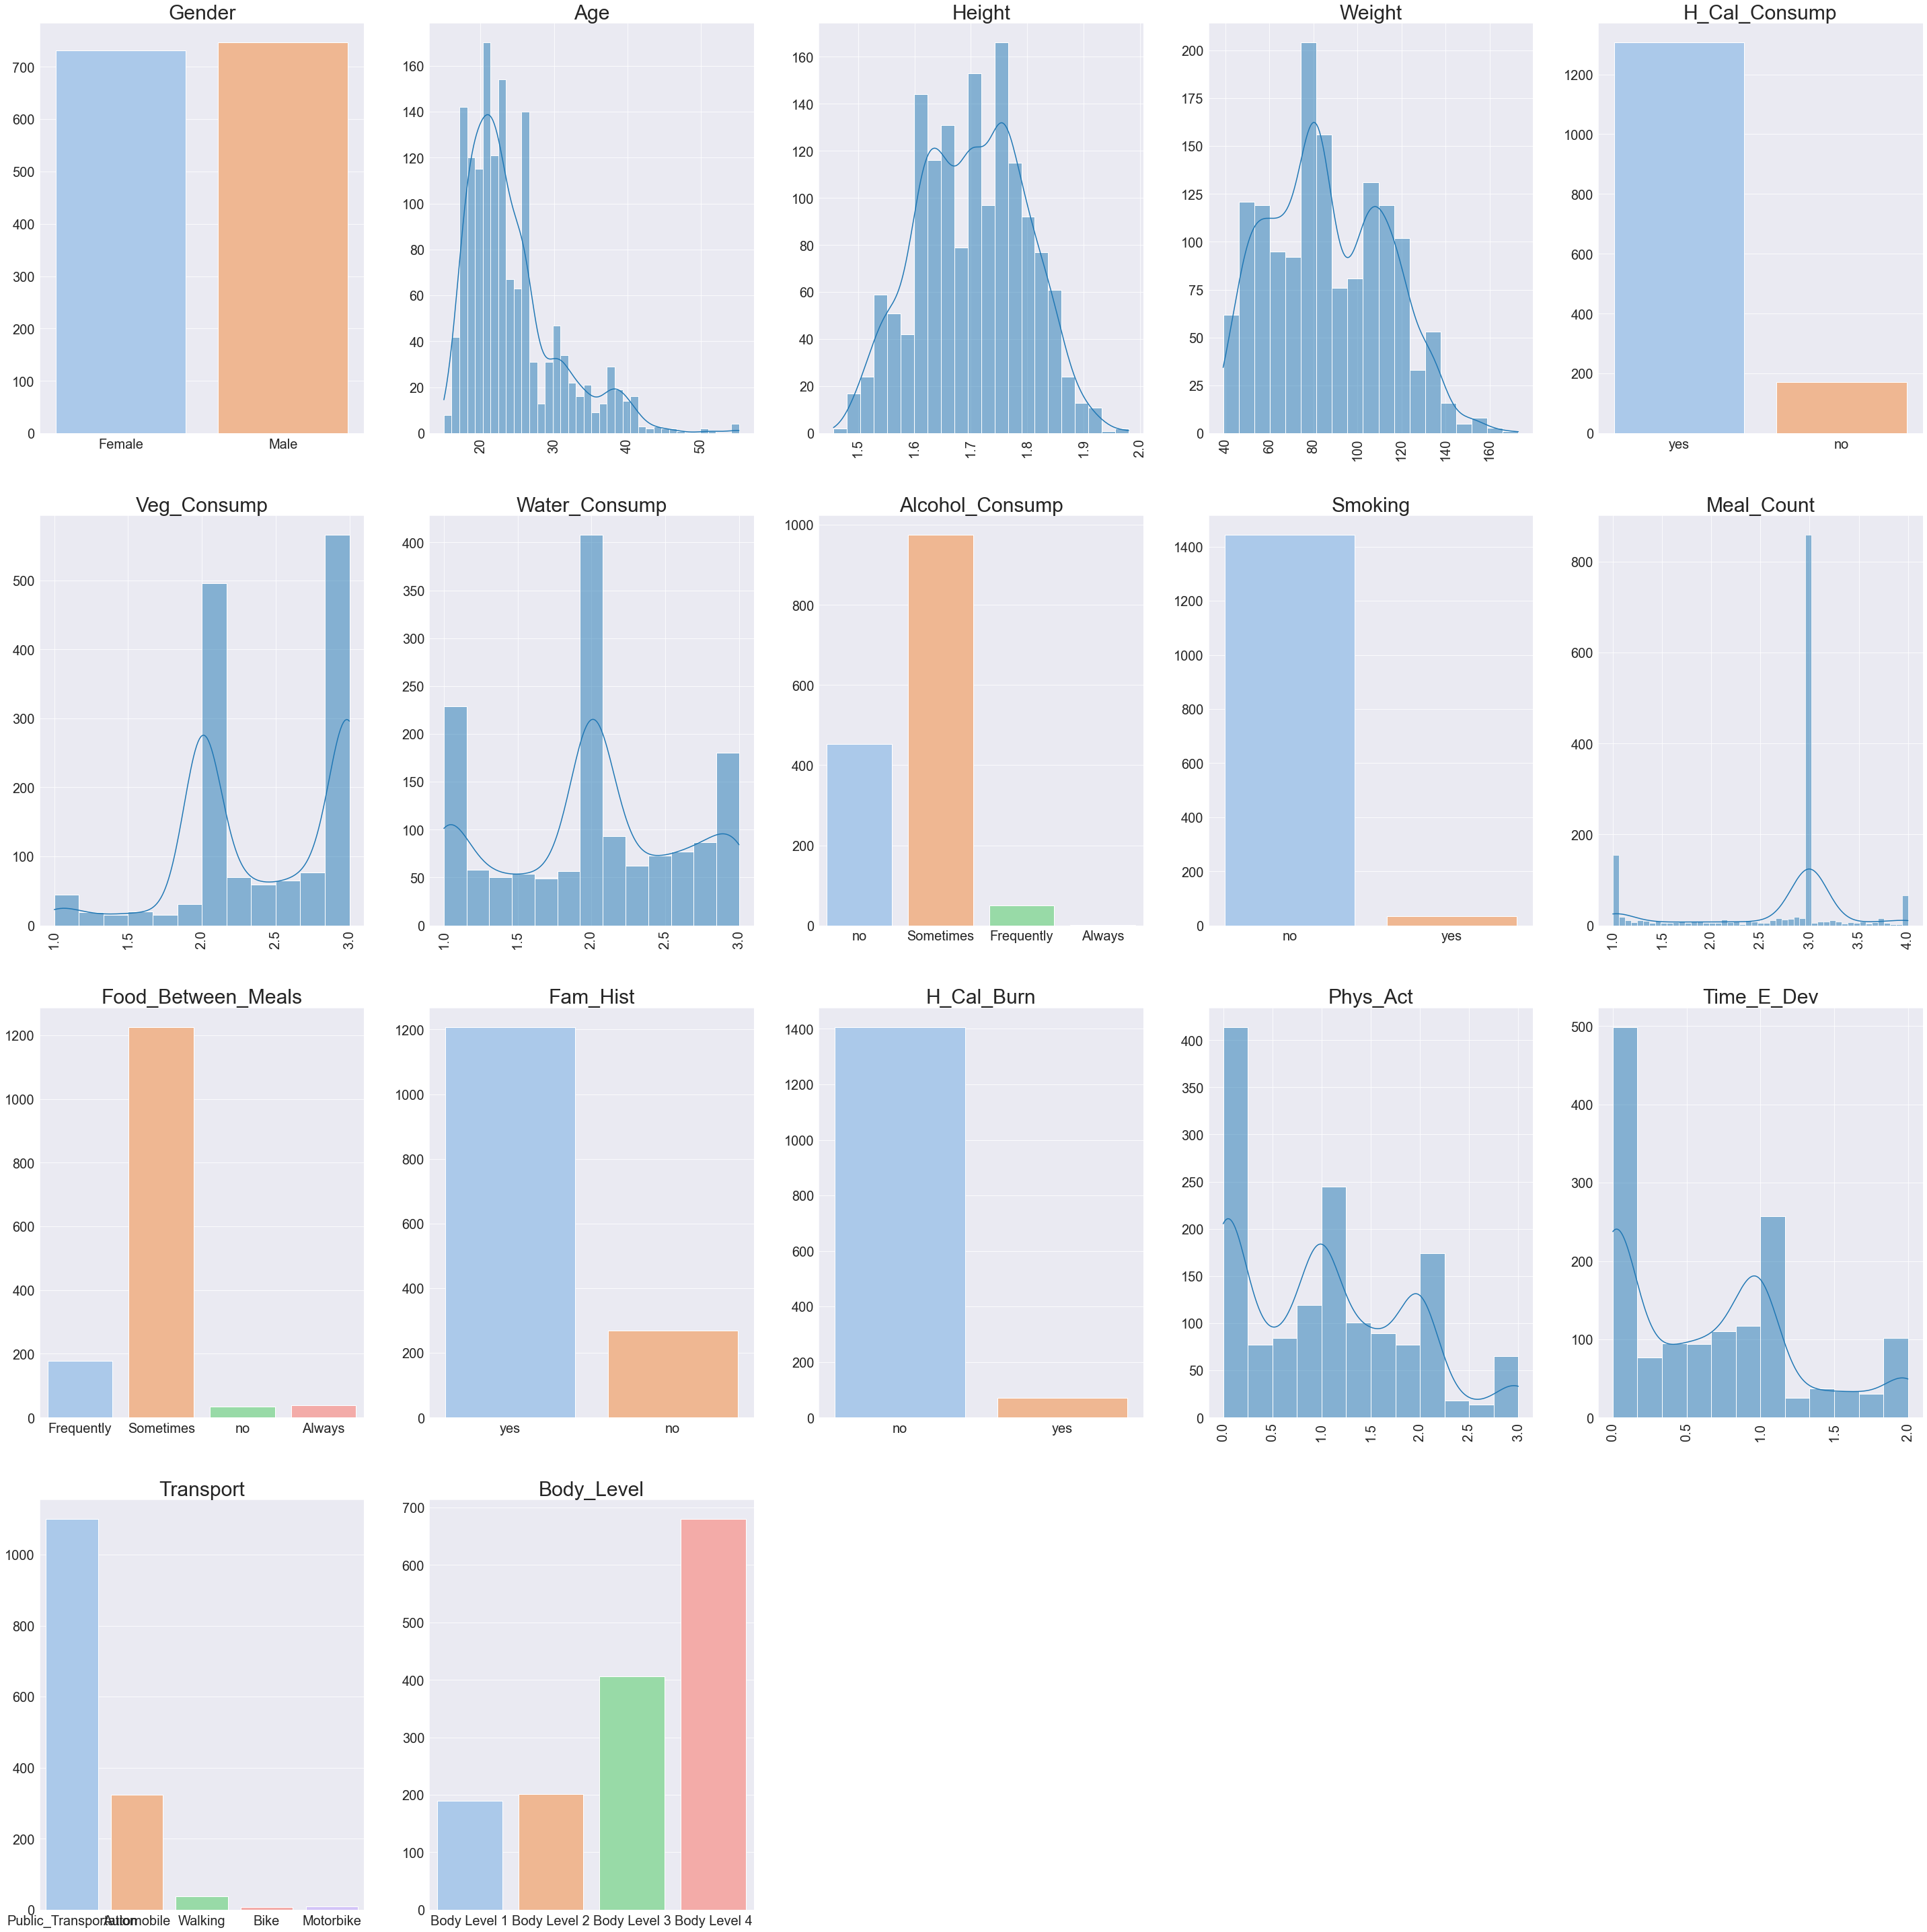

In [6]:
# in a grid plot, we plot the countplot of each feature
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40, 40))
cols = 5
rows = int(np.ceil(float(df.shape[1]) / cols))
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    # increase the font size of the title
    plt.title(column, fontsize=30)
    if df.dtypes[column] == object:
        sns.countplot(x=column, data=df,axes=ax,  palette='pastel')
        
    else:
        # distplot with color
        sns.histplot(df[column].dropna(), ax=ax, palette='pastel', kde=True)
        plt.xticks(rotation="vertical")
    # increase the font size of the x and y ticks and labels
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.xlabel('') # xlabel is empty
    plt.ylabel('') # ylabel is empty

        
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)


# 2. Encoding the features into numeric values

In [66]:
# conver all the columns values into numerical values
df_new= df.copy()
for col in df_new.columns:
    if df_new[col].dtype == 'object':
        df_new[col] = LabelEncoder().fit_transform(df_new[col])

df_new.head()
# export the data head to image
df_new.head().to_html('outputs_svm/data_head.html')


In [8]:
df_new.describe()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,0.505078,24.290420,1.701602,86.542290,0.884225,2.421912,2.005120,2.271496,0.022343,2.682104,1.851726,0.817874,0.047393,1.023106,0.650672,2.354096,2.067028
std,0.500144,6.323081,0.094654,26.278277,0.320064,0.540711,0.620307,0.518055,0.147845,0.790751,0.474647,0.386079,0.212551,0.844840,0.605199,1.266037,1.052280
min,0.000000,15.000000,1.456346,39.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.895877,1.629194,65.000000,1.000000,2.000000,1.549931,2.000000,0.000000,2.644692,2.000000,1.000000,0.000000,0.145687,0.000000,3.000000,1.000000
50%,1.000000,22.720449,1.701284,82.636162,1.000000,2.416044,2.000000,2.000000,0.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.616045,3.000000,2.000000
75%,1.000000,26.000000,1.770278,106.690530,1.000000,3.000000,2.482933,3.000000,0.000000,3.000000,2.000000,1.000000,0.000000,1.672639,1.000000,3.000000,3.000000
max,1.000000,55.246250,1.980000,173.000000,1.000000,3.000000,3.000000,3.000000,1.000000,4.000000,3.000000,1.000000,1.000000,3.000000,2.000000,4.000000,3.000000


# SVM & Oversampling

In [65]:
# apply PCA on the dataset to reduce the dimensionality to 3
from sklearn.decomposition import PCA
from utils import apply_svm_model
x = df_new.drop('Body_Level', axis=1)
y = df_new['Body_Level']

# apply svm model
kernel, C, gamma, accs, f1_accs = apply_svm_model(X, y, kernel=['linear', 'rbf', 'poly'], C=[1.0, 5.0, 14.0 ], gamma=[0.1, 0.01, 0.001])


........ for kernel:  linear gamma:  0.1  and C:  1.0 .......
- Average weighted F1 score 0.93085 (+/- 0.02500)
- Average Accuracy score 0.93230 (+/- 0.02383)
.................................................................
........ for kernel:  rbf gamma:  0.1  and C:  1.0 .......
- Average weighted F1 score 0.91716 (+/- 0.02045)
- Average Accuracy score 0.91876 (+/- 0.02051)
.................................................................
........ for kernel:  poly gamma:  0.1  and C:  1.0 .......
- Average weighted F1 score 0.96956 (+/- 0.01245)
- Average Accuracy score 0.96953 (+/- 0.01258)
.................................................................
........ for kernel:  linear gamma:  0.01  and C:  1.0 .......
- Average weighted F1 score 0.93085 (+/- 0.02500)
- Average Accuracy score 0.93230 (+/- 0.02383)
.................................................................
........ for kernel:  rbf gamma:  0.01  and C:  1.0 .......
- Average weighted F1 score 0.85265 (+/- 0.0

# 3. PCA


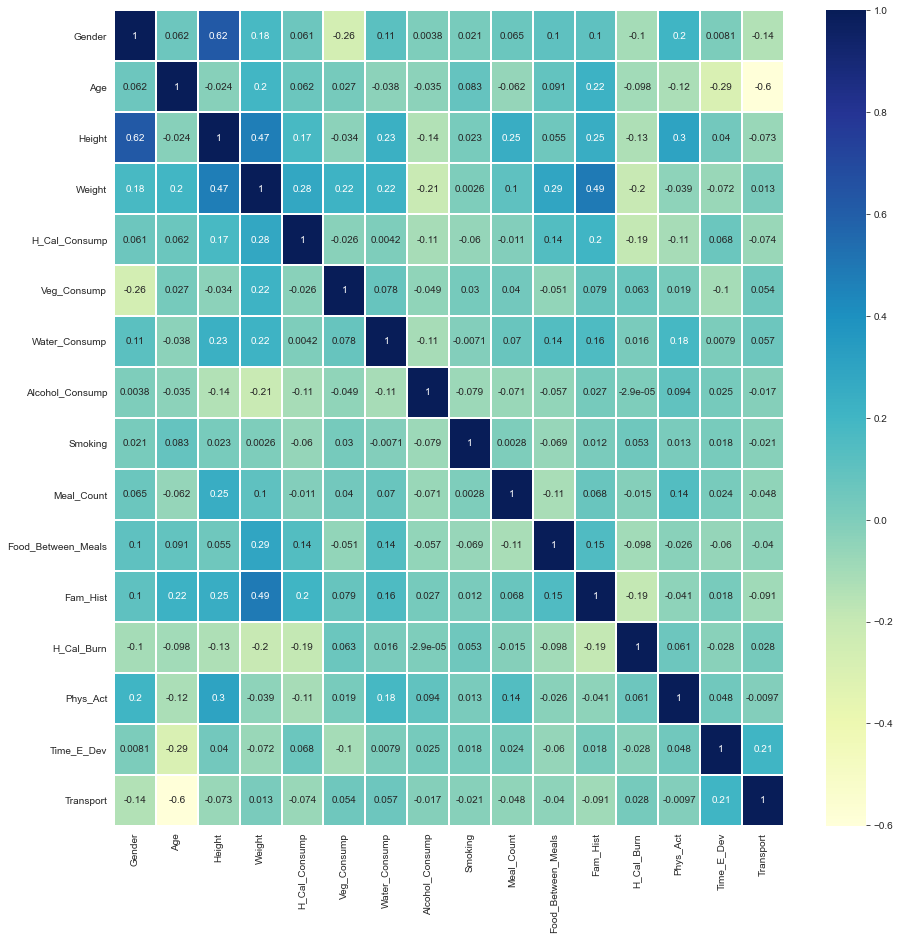

In [11]:
# plot heatmap of the new data
plt.figure(figsize=(15, 15))
x = df_new.drop('Body_Level', axis=1)
sns.heatmap(x.corr(), annot=True,cmap='YlGnBu', linewidths=0.2)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

some of the features are correlated, so I will try to reduce the dimensionality of the data using PCA

1. 2D

In [19]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

[9.41199771e-01 5.30152849e-02 1.44062448e-03 9.99002340e-04
 7.75689697e-04 5.03408362e-04 4.77878348e-04 4.18536841e-04
 3.39668113e-04 2.60231694e-04 2.19090541e-04 1.45441098e-04
 1.17178378e-04 5.50335546e-05 2.86205703e-05 4.54042207e-06]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-34.712773,-0.091632,-0.653083,0.058130,-0.738910,0.347779,0.948728,-0.790548,-0.457050,0.289202,0.078375,-0.404397,-0.105335,-0.029139,-0.024156,0.110846
1,-31.791075,-3.008524,0.265347,1.062505,-0.240013,1.162620,-1.069063,-0.458204,0.158104,-0.162269,-0.340719,-0.359223,-0.007904,-0.028363,-0.032728,-0.004840
2,-36.828599,-4.666438,-0.145797,-0.566843,-1.089037,0.508983,0.303921,0.348888,0.537074,-0.635126,0.286014,0.339855,-0.302651,-0.087930,0.016002,0.106878
3,-36.878274,-3.510460,0.208753,0.674397,-0.280775,0.705449,0.703571,0.498713,0.824067,-0.759880,0.710388,0.287630,-0.312777,-0.084673,0.009618,0.065300
4,-28.536992,-2.841872,3.046485,-0.052339,0.089592,0.487587,0.025437,-0.568380,-0.607225,-0.226619,-0.452194,-0.245629,-0.033329,-0.041483,0.011994,0.029173


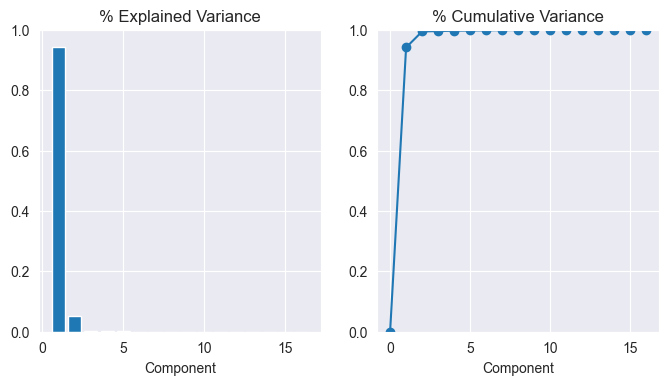

In [20]:
x = df_new.drop('Body_Level', axis=1)

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(x)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
# print the highest variance components
print(pca.explained_variance_ratio_)
# Look at explained variance
plot_variance(pca)

X_pca.head()

it seems that the most important PCAs are the first 2 PCAs

In [21]:
# apply PCA on the dataset to reduce the dimensionality and visualize the data
from sklearn.decomposition import PCA
x = df_new.drop('Body_Level', axis=1)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
# print the first 5 rows of the new data
print(X_pca[:5])


[[-34.71277348  -0.09163182]
 [-31.79107504  -3.00852391]
 [-36.82859871  -4.66643785]
 [-36.87827391  -3.51046044]
 [-28.53699161  -2.84187154]]


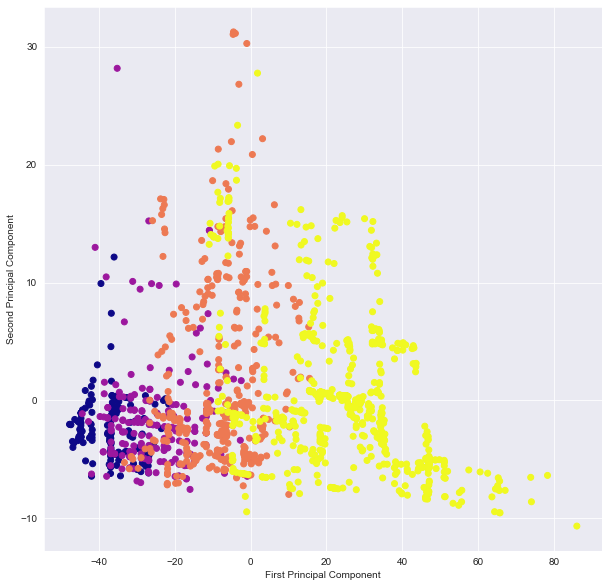

In [22]:
# plot the data
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig('pca.png', dpi=300, bbox_inches='tight')


2. 3D

In [23]:
print(y.value_counts())

3    680
2    406
1    201
0    190
Name: Body_Level, dtype: int64


In [24]:
# apply pca on the data to plot it in 3D
from sklearn.decomposition import PCA
x = df_new.drop('Body_Level', axis=1)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x)
# print the first 5 rows of the new data
print(X_pca[:5])


[[-34.71277348  -0.09163182  -0.65308313]
 [-31.79107504  -3.00852391   0.26534732]
 [-36.82859871  -4.66643785  -0.14579714]
 [-36.87827391  -3.51046044   0.20875342]
 [-28.53699161  -2.84187154   3.04648481]]


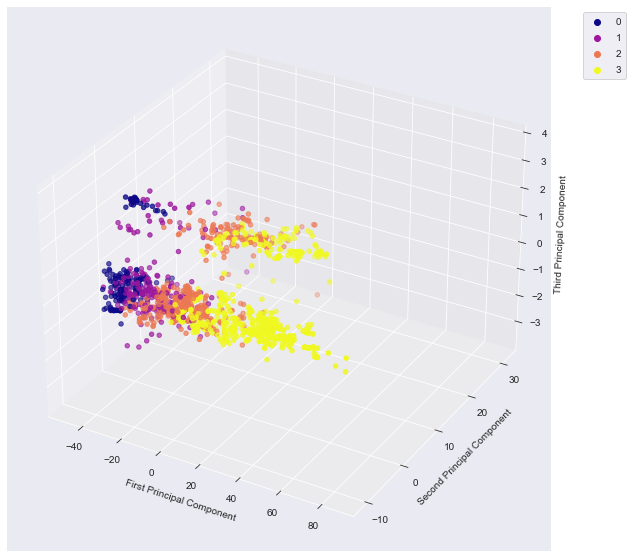

In [25]:
# plot the data
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='plasma')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
# add legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.savefig('pca_3d.png', dpi=300, bbox_inches='tight')



In [72]:
# apply pca on resampled data using SMOTE
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
x = df_new.drop('Body_Level', axis=1)
y = df_new['Body_Level']
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x)
# print the first 5 rows of the new data
print(X_pca[:5])

[[-23.08709263   1.24184829  -0.59768692]
 [-20.24852328  -1.78123748   0.24530402]
 [-25.34080387  -3.28546778  -0.23283681]
 [-25.35247013  -2.13134661   0.07941005]
 [-16.9927216   -1.74456323   2.96546416]]


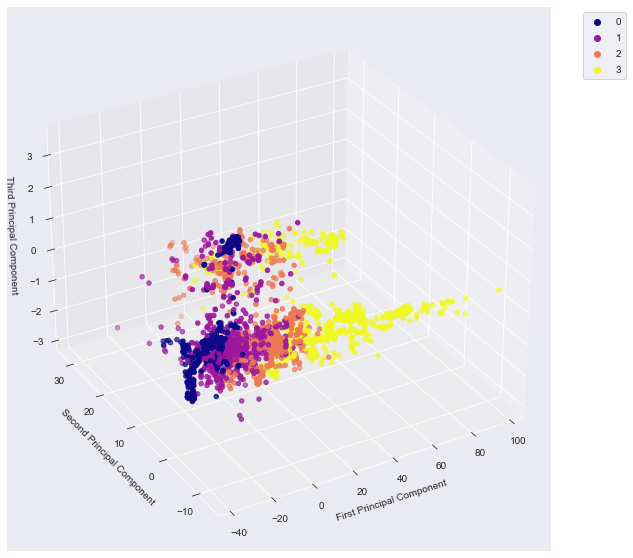

In [90]:
# plot the data
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='plasma')
# rotate the plot to see it from upside down
ax.view_init(azim=-120)

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
# add legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# Weighted SVM

In [34]:
counts = df_new['Body_Level'].value_counts()
# convert the counts into dictionary
counts = counts.to_dict()
counts

{3: 680, 2: 406, 1: 201, 0: 190}

In [47]:
X = df_new.drop('Body_Level', axis=1)
y = df_new['Body_Level']

# define the class weights
class_weights = {0: len(X)/(4.0*counts[0]), 1:len(X)/(4*counts[1]), 2:len(X)/(4*counts[2]), 3: len(X)/(4*counts[3])}
print(class_weights)
model = SVC(gamma='auto', class_weight=class_weights, kernel='linear', C=14)

# apply cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

# evaluate the model with f1-score
scores = cross_val_score(model, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
scores_acc = cross_val_score(model, X, y, scoring='accuracy' , cv=cv, n_jobs=-1)

# report the model performance w.r.t accuracy and f1-score
print('F1-score, std: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print('Acc score, std: %.3f (%.3f)' % (np.mean(scores_acc), np.std(scores_acc)))


{0: 1.943421052631579, 1: 1.8370646766169154, 2: 0.9094827586206896, 3: 0.5430147058823529}
F1-score, std: 0.969 (0.016)
Acc score, std: 0.978 (0.013)


In [49]:
# define grid
balance = [{0: len(X)/(4.0*counts[0]), 1:len(X)/(4*counts[1]), 2:len(X)/(4*counts[2]), 3: len(X)/(4*counts[3])}, {0: 190, 1: 201, 2: 406, 3: 680}
,{0:0.25, 1:0.25, 2:0.25, 3:0.25}
]
param_grid = dict(class_weight=balance, C = [1.0, 5.0, 10.0, 15.0, 20.0], gamma = [1.0, 0.1, 0.01, 0.001], kernel = ['linear', 'rbf', 'poly'])


In [50]:
from sklearn.model_selection import GridSearchCV

model = SVC()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1_macro')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.974796 using {'C': 1.0, 'class_weight': {0: 190, 1: 201, 2: 406, 3: 680}, 'gamma': 1.0, 'kernel': 'linear'}
0.898019 (0.028492) with: {'C': 1.0, 'class_weight': {0: 1.943421052631579, 1: 1.8370646766169154, 2: 0.9094827586206896, 3: 0.5430147058823529}, 'gamma': 1.0, 'kernel': 'linear'}
0.607299 (0.032781) with: {'C': 1.0, 'class_weight': {0: 1.943421052631579, 1: 1.8370646766169154, 2: 0.9094827586206896, 3: 0.5430147058823529}, 'gamma': 1.0, 'kernel': 'rbf'}
0.957754 (0.021132) with: {'C': 1.0, 'class_weight': {0: 1.943421052631579, 1: 1.8370646766169154, 2: 0.9094827586206896, 3: 0.5430147058823529}, 'gamma': 1.0, 'kernel': 'poly'}
0.898019 (0.028492) with: {'C': 1.0, 'class_weight': {0: 1.943421052631579, 1: 1.8370646766169154, 2: 0.9094827586206896, 3: 0.5430147058823529}, 'gamma': 0.1, 'kernel': 'linear'}
0.876522 (0.036115) with: {'C': 1.0, 'class_weight': {0: 1.943421052631579, 1: 1.8370646766169154, 2: 0.9094827586206896, 3: 0.5430147058823529}, 'gamma': 0.1, 'kernel':

In [63]:
# apply linear svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

X = df_new.drop('Body_Level', axis=1)
y = df_new['Body_Level']
# define the model
model = LinearSVC(random_state=42, penalty='l1', loss='squared_hinge', dual=False, C=1.0, class_weight='balanced')
# apply cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
# evaluate the model with f1-score
scores = cross_val_score(model, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
# report the model performance w.r.t accuracy and f1-score
print("f1-scores", scores)

print('F1-score, std: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))



f1-scores [0.83659779 0.81856499 0.86455454 0.83408372 0.82713908 0.78073327
 0.8809169  0.86779756 0.79376433 0.76935834 0.7594888  0.80388299
 0.87870925 0.79975964 0.77973508 0.83112399 0.80105212 0.8499609
 0.84722112 0.86153846 0.84431809 0.83337034 0.89801493 0.85084034
 0.79044756 0.80318489 0.84871599 0.85357197 0.75024912 0.82160657]
F1-score, std: 0.826 (0.037)
